## Kütüphanelerin import Edilmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook

## Veri Setini Oluşturma

In [2]:
from sklearn.datasets import make_regression
x, y = make_regression(n_samples=1000, n_features=1, noise=5, n_targets=1,random_state=42)

x = np.array(x)
y = np.array(y).reshape(-1, 1) 


## Verileri Train ve Test Olarak Bölme

In [3]:
def train_test_split(data, target, test_ratio=0.2, random_seed=None):
    num_samples = len(data)
    num_test_samples = int(test_ratio * num_samples)
    
    if random_seed is not None:
        np.random.seed(random_seed)
    
    shuffled_indices = np.random.permutation(num_samples)
    test_indices = shuffled_indices[:num_test_samples]
    train_indices = shuffled_indices[num_test_samples:]
    
    x_train = data[train_indices]
    y_train = target[train_indices]
    x_test = data[test_indices]
    y_test = target[test_indices]
    
    return x_train, x_test, y_train, y_test

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_ratio=0.2, random_seed=0)

## Minibatch Stochastic Gradient Descent - SGD Fonksiyonu

In [5]:
def minibatch_sgd(x, y, theta0, theta1, minibatch_size, learning_rate, num_epochs, threshold):
    m = len(x)
    num_minibatches = m // minibatch_size
    
    theta_history = []
    
    for epoch in range(num_epochs):
        shuffled_indices = np.random.permutation(m)
        shuffled_x = x[shuffled_indices]
        shuffled_y = y[shuffled_indices]
        
        for i in range(num_minibatches):
            start_idx = i * minibatch_size
            end_idx = start_idx + minibatch_size
            
            x_batch = shuffled_x[start_idx:end_idx]
            y_batch = shuffled_y[start_idx:end_idx]
            
            h = theta0 * theta1 * x_batch
            error = h - y_batch
            
            theta0 = theta0 - (learning_rate/num_minibatches) * sum(error)
            theta1 = theta1 - (learning_rate/num_minibatches) * sum(error * x_batch)
            
        
        theta_history.append((theta0, theta1))
        
        mse = np.mean(error ** 2)
        rmse = np.sqrt(mse)
        #print(rmse)
        if rmse < threshold:
            print(f"Threshold ({threshold}) değeri aşıldı. Epoch: {epoch + 1}")
            break
    
    return theta_history

## Parametre Değerleri

In [6]:
initial_theta0 = 0
initial_theta1 = 1

learning_rate = 0.001
iterations = 500
threshold = 9.3

minibatch = 50

In [7]:
# Görselleştirme amacıyla bütün iterasyon aşamalarındaki tetha değerleri liste olarak tutuluyor
#theta_history = gradient_descent(x_train, y_train, initial_theta0, initial_theta1, learning_rate, iterations, threshold)
theta_history = minibatch_sgd(x_train, y_train, initial_theta0, initial_theta1, minibatch, learning_rate, iterations, threshold)

final_theta0 = theta_history[(len(theta_history)-1)][0]
final_theta1 = theta_history[(len(theta_history)-1)][1]

print(f"Final theta0: {final_theta0}")
print(f"Final theta1: {final_theta1}")

Threshold (9.3) değeri aşıldı. Epoch: 20
Final theta0: [0.44169689]
Final theta1: [14.87684338]


## Eğitimin Görselleştirilmesi

<IPython.core.display.Javascript object>


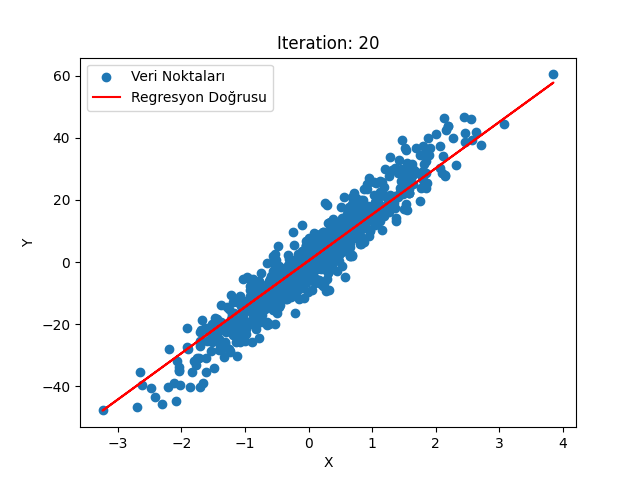

In [8]:
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, label='Veri Noktaları')
line, = ax.plot([], [], color='red', label='Regresyon Doğrusu')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Lineer Regresyon')
ax.legend()

def init():
    line.set_data([], [])
    return line,

def animate(i):
    theta0, theta1 = theta_history[i]
    line.set_data(x_train, theta0 + theta1 * x_train)
    ax.set_title(f'Iteration: {i+1}')
    return line,

ani = FuncAnimation(fig, animate, frames=len(theta_history), init_func=init, blit=True, interval=100, repeat=False)

plt.show()

## Tahmin Fonksiyonu 

In [ ]:
def predict(x, theta0, theta1):
    predictions = theta0 + theta1 * x
    return predictions

In [ ]:
y_pred = predict(x_test, final_theta0, final_theta1)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_test, y_test, label='Gerçek Değerler', color='blue')
ax.scatter(x_test, y_pred, label='Tahmin Edilen Değerler', color='red')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Gerçek ve Tahmin Edilen Değerler')
ax.legend()

plt.show()

## Loss Grafiği

In [ ]:
loss_history = []

for theta0, theta1 in theta_history:
    h = theta0 + theta1 * x_train
    error = h - y_train
    mse = np.mean(error ** 2)
    loss_history.append(mse)

fig, ax = plt.subplots()
ax.plot(range(len(loss_history)), loss_history, color='blue')
ax.set_xlabel('İterasyon')
ax.set_ylabel('Kayıp (MSE) Değeri')
ax.set_title('MSE Değerlerinin Değişimi')

plt.show()